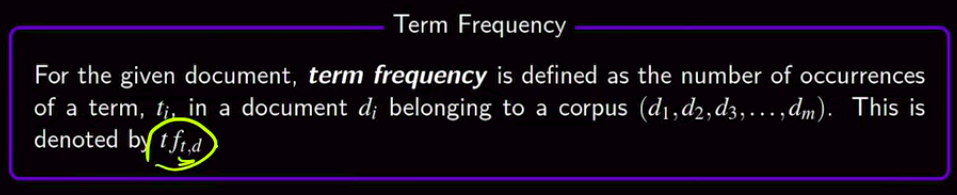

In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pandas as pd

In [2]:
 #nltk.download('stopwords')
#nltk.download('gutenberg')    
#nltk.download('punkt')

In [3]:
stop_words=set(stopwords.words('english'))
print(stop_words)

{'after', 'not', "you'll", 'by', 'who', 'to', 'an', 'up', 'from', 'over', "mightn't", 'hers', 'down', 'a', 'those', 'nor', 'wasn', 'themselves', 'during', 'wouldn', 'you', "you've", 'all', 'y', 'both', 'didn', 'weren', 'than', "won't", 'needn', 'same', 'o', "isn't", "wouldn't", 'there', 'whom', 'isn', "she's", 'with', 'my', 'above', 'no', "it's", 'why', 'him', 'which', 'what', 'will', 'has', "couldn't", 'about', 'hadn', 'did', 'as', 'how', 'ma', "weren't", "haven't", 'if', 'on', 'have', 'couldn', 'is', 'are', 'she', 've', "shouldn't", 'i', 'ourselves', 'mightn', 'he', 'where', 'myself', 'out', 're', 'ain', 't', 'it', 'won', 'before', 'further', 'or', 'each', 'were', 'some', 'these', 'and', 'ours', 'do', 'while', 'here', 'when', 'theirs', "wasn't", 'because', 'its', 'so', 'again', 'am', 'been', 'more', 'other', 'your', 'himself', 'doesn', 's', 'own', 'their', 'don', 'of', 'yourselves', 'for', 'few', 'they', "mustn't", "needn't", 'yourself', 'until', 'that', 'herself', "that'll", 'her', 

In [4]:
#read the corpus
words = nltk.Text(nltk.corpus.gutenberg.words('bryant-stories.txt'))
print(len(words))
print(words)

55563
<Text: Stories to Tell to Children by Sara Cone Bryant 1918>


In [5]:
#convert to small letters
words=[word.lower() for word in words if word.isalpha()]
print(len(words))
print(" ".join(words)[:200])

46611
stories to tell to children by sara cone bryant two little riddles in rhyme there s a garden that i ken full of little gentlemen little caps of blue they wear and green ribbons very fair flax from hou


In [6]:
words=[word.lower() for word in words if word not in stop_words]
print(len(words))
print(" ".join(words)[:200])

21718
stories tell children sara cone bryant two little riddles rhyme garden ken full little gentlemen little caps blue wear green ribbons fair flax house house goes messenger small slight whether rains sno


In [7]:
fDist=FreqDist(words)
fDist

FreqDist({'little': 597, 'said': 453, 'came': 191, 'one': 183, 'could': 158, 'king': 141, 'went': 122, 'would': 112, 'great': 110, 'day': 107, ...})

In [8]:
print("Total words",len(words))
print("Unique words",len(set(words)))

Total words 21718
Unique words 3688


In [9]:
for x,v in fDist.most_common(10):
    print(x,v)

little 597
said 453
came 191
one 183
could 158
king 141
went 122
would 112
great 110
day 107


In [10]:
print("Term Frequency:")
for x,v in fDist.most_common(10):
    print(x,round(v/len(fDist),4))

Term Frequency:
little 0.1619
said 0.1228
came 0.0518
one 0.0496
could 0.0428
king 0.0382
went 0.0331
would 0.0304
great 0.0298
day 0.029


In [11]:
df=pd.DataFrame(fDist.most_common(10),columns=["Word","Frequency"])
TF=[round(v/len(fDist),4) for x,v in fDist.most_common(10)]
df.loc[:,'TF']=TF
df

,Word,Frequency,TF
0,little,597,0.1619
1,said,453,0.1228
2,came,191,0.0518
3,one,183,0.0496
4,could,158,0.0428
5,king,141,0.0382
6,went,122,0.0331
7,would,112,0.0304
8,great,110,0.0298
9,day,107,0.0290
